# Gemini Pro Quickstrt

https://ai.google.dev/tutorials/python_quickstart

In [3]:
import pathlib
import textwrap
import google.generativeai as genai

from IPython.display import display, Markdown

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

/Users/alextanhongpin/Documents/python/python-google-gemini/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import os
GOOGLE_API_KEY = os.environ['GOOGLE_API_KEY']
genai.configure(api_key=GOOGLE_API_KEY)

In [9]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [10]:
model = genai.GenerativeModel('gemini-pro')

## Generate text from text inputs

In [11]:
%%time
response = model.generate_content('What is NOT the meaning of life?')

CPU times: user 8.71 ms, sys: 6.84 ms, total: 15.6 ms
Wall time: 1.86 s


In [14]:
to_markdown(response.text)

> Meaninglessness

In [15]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [17]:
response.candidates

[index: 0
content {
  parts {
    text: "Meaninglessness"
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [18]:
%%time
response = model.generate_content('What should I do on a weekend in Singapore?', stream=True)

CPU times: user 4.65 ms, sys: 3.88 ms, total: 8.52 ms
Wall time: 1.42 s


In [19]:
for chunk in response:
    print(chunk.text)
    print('_' * 80)

**1. Explore Gardens by the Bay:**

- Visit the Flower Dome and
________________________________________________________________________________
 Cloud Forest conservatories for an immersive experience of unique plant life.
- Take a walk through the Supertree Grove and witness the stunning light and sound show at
________________________________________________________________________________
 night.

**2. Visit the Singapore Zoo:**

- See a variety of animals from around the world, including iconic species such as giant pandas and orangutans.
- Take a tram ride or walk through the different habitats to learn about wildlife conservation.

**3. Soak in the Culture at Chinatown:**
________________________________________________________________________________


- Explore the bustling streets lined with shops, restaurants, and temples.
- Visit the Buddha Tooth Relic Temple, Sri Mariamman Temple, and Chinatown Heritage Center to learn about the history and culture of Singapore's Chinatown

In [20]:
response = model.generate_content('What can I do on a weekend in Singapore in the end of December?')
to_markdown(response.text)

> 1. Attend the "Christmas Wonderland": Singapore's largest Christmas carnival features festive decorations, live performances, amusement rides, and culinary delights.
> 
> 2. Shop at the Orchard Road Christmas Light-Up: Experience the festive atmosphere along Orchard Road, Singapore's famous shopping district, decorated with dazzling light displays.
> 
> 3. Visit Gardens by the Bay's Christmas Floral Display: Marvel at the enchanting Christmas-themed floral displays, including a giant Christmas tree, reindeer, and life-sized nutcrackers.
> 
> 4. Take a New Year's Eve River Cruise: Enjoy a cruise along the Singapore River, offering panoramic views of the city's skyline illuminated by fireworks.
> 
> 5. Countdown Party at Marina Bay Singapore Countdown: Witness the spectacular fireworks display over the Marina Bay skyline and join the countdown to the New Year.
> 
> 6. Explore Festive Markets: Visit markets like the Christmas Village at the Singapore Botanic Gardens or the ArtScience Museum's Festive Market for unique gifts and seasonal treats.
> 
> 7. Catch a Festive Show: Enjoy performances like "The Nutcracker" ballet, pantomimes, or Christmas-themed concerts happening across the city.
> 
> 8. Visit Sentosa Island: Experience festive attractions like the Universal Studios Singapore Christmas event, enjoy beachside festivities, or take a ride on the Sentosa Express Festive Train.
> 
> 9. Indulge in Festive Dining: Sample Christmas-themed menus at various restaurants across Singapore, offering a diverse range of cuisines.
> 
> 10. Check Out the Festive Activities at Changi Airport: Immerse yourself in the festive atmosphere at Changi Airport, with decorations, events, and shopping promotions.

## Generate text from image and text inputs

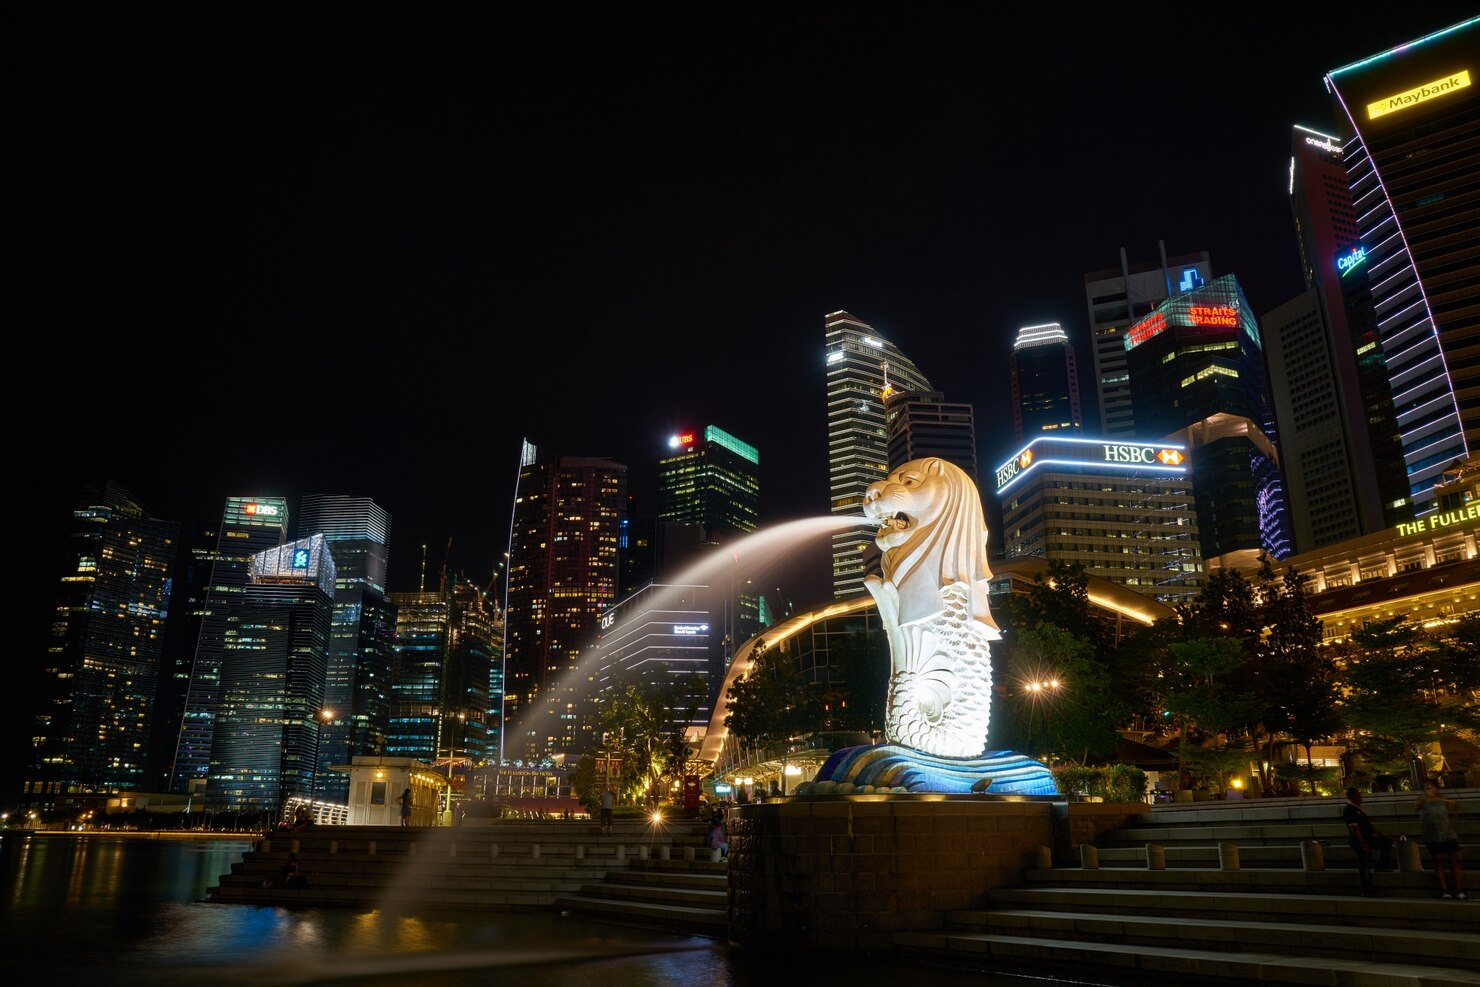

In [46]:
# from PIL import Image

# img = Image.open('singapore.jpeg')
# img
from IPython.display import Image
img = Image(filename='singapore.jpeg')
img

In [45]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)
to_markdown(response.text)

>  The Merlion is a mythical creature with the head of a lion and the body of a fish. It is a symbol of Singapore and can be found in various places around the city, including this statue at Merlion Park.

In [47]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(['what time is it?', img])
to_markdown(response.text)

>  The answer is: 9:05 PM
> 
> A step-by-step solution:
> The time is 9:05 PM because the lights are on in the city and the sky is dark.

## Chat conversations

In [48]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [50]:
response = chat.send_message('in one sentence, explain how linear regression works')
to_markdown(response.text)

> Linear regression finds a line that best fits a set of data points by minimizing the sum of squared errors between the data and the line.

In [51]:
chat.history

[parts {
   text: "in one sentence, explain how linear regression works"
 }
 role: "user",
 parts {
   text: "Linear regression models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data."
 }
 role: "model",
 parts {
   text: "in one sentence, explain how linear regression works"
 }
 role: "user",
 parts {
   text: "Linear regression finds a line that best fits a set of data points by minimizing the sum of squared errors between the data and the line."
 }
 role: "model"]

In [52]:
response = chat.send_message("Okay, how to scale linear regression?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

Linear regression can be scaled by standardizing the features (independent variables) and/
________________________________________________________________________________
or the target variable (dependent variable).

* **Standardizing the features:** Subtracting the mean and dividing by the standard deviation of each feature scales
________________________________________________________________________________
 the features to have a mean of 0 and a standard deviation of 1. This helps improve the comparability of different features and can make the regression model more robust.
* **Standardizing the target variable:** Subtracting the mean and dividing by the standard deviation of the target variable scales the target variable
________________________________________________________________________________
 to have a mean of 0 and a standard deviation of 1. This can be useful if the target variable is measured in different units or has a different scale than the features.

Scaling lin

## Use embeddings

The following task types are supported:
- retrieval_query: specifies the given text is a query in a search/retrieval setting
- retrieval_document: specifies the given text is a document in a search retrieval/setting. Using this task type requires a *title*
- semantic_similarity: specifies the given text will be used for Semantic Textual Similarity (STS)
- classification: specifies the embedding will be used for classification
- clustering: specifies the embeddings will be used for clustering

In [55]:
result = genai.embed_content(
    model='models/embedding-001',
    content='What is the meaning of life?', # can be a list
    task_type='retrieval_document',
    title='Embedding of single string')

print((result['embedding'])[:5], '... TRIMMED')

[-0.003216741, -0.013358698, -0.017649598, -0.009181086, 0.03926703] ... TRIMMED


In [56]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.008154679, -0.04870587, 0.016001862, 0.0173824 ... TRIMMED...
[0.0016800502, -0.05122805, 0.016959341, 0.0341162 ... TRIMMED...
[-0.008154679, -0.04870587, 0.016001862, 0.0173824 ... TRIMMED...
[0.014223579, -0.040009256, 0.019955419, 0.0250522 ... TRIMMED...
[-0.012131832, -0.067695156, -0.0015688286, 0.0146 ... TRIMMED...
[-0.021771803, -0.073790655, -0.02459576, 0.031747 ... TRIMMED...
